In [2]:
%load_ext nb_black
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns

# files
vacc_race_path = "data/vacc_race.csv"
vacc_age_path = "data/vacc_age.csv"
race_path = "data/race_data.csv"
age_path = "data/age_data.csv"

# dataframes
vacc_race = pd.read_csv(vacc_race_path)
vacc_age = pd.read_csv(vacc_age_path)
deaths_by_race = pd.read_csv(race_path)
deaths_by_age = pd.read_csv(age_path)

# replaced wrong values
vacc_age = vacc_age.replace(to_replace="17-Dec", value="12-17")
vacc_age = vacc_age.replace(to_replace="11-May", value="05-11")

vacc_race = vacc_race.replace(to_replace="aian", value="asian")
deaths_by_race["race"] = deaths_by_race["race"].replace(
    to_replace="cdph-other", value="other"
)
deaths_by_age["age"] = deaths_by_age["age"].replace(to_replace="17-May", value="05-17")

# # changed bins for race dataframe
deaths_by_race = deaths_by_race[deaths_by_race["age"].str.contains("0-17") == False]
deaths_by_race = deaths_by_race[deaths_by_race["age"].str.contains("18+") == False]
deaths_by_race = deaths_by_race[deaths_by_race["age"].str.contains("18-34") == False]
deaths_by_race = deaths_by_race[deaths_by_race["age"].str.contains("35-49") == False]
deaths_by_race = deaths_by_race[deaths_by_race["age"].str.contains("50-64") == False]
deaths_by_race = deaths_by_race[deaths_by_race["age"].str.contains("65-79") == False]
deaths_by_race = deaths_by_race[deaths_by_race["age"].str.contains("80+") == False]


# capitalize race names for bar labels
deaths_by_race["race"] = deaths_by_race["race"].map(str.capitalize)


<IPython.core.display.Javascript object>

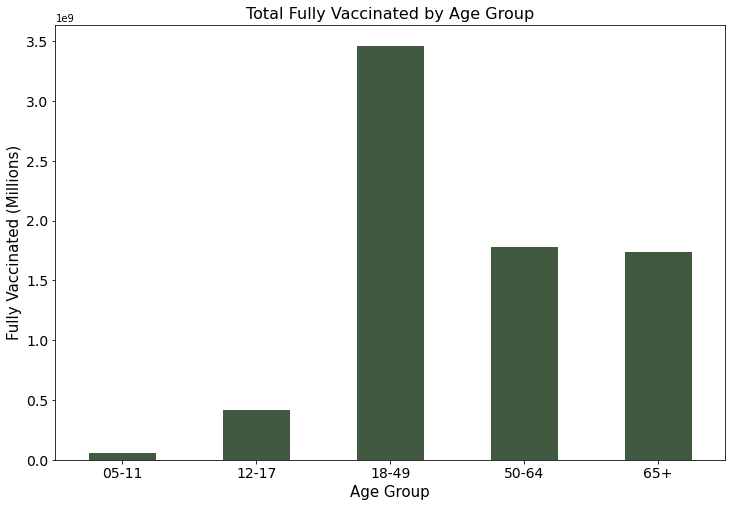

<IPython.core.display.Javascript object>

In [3]:
vacc_visual = vacc_age.groupby("age_group").sum()
vacc_visual["fully_vaccinated"].plot(
    kind="bar", figsize=(12, 8), fontsize=14,color="#415941"
)
plt.title("Total Fully Vaccinated by Age Group", fontdict={"fontsize": 16}, y=1,)
plt.xlabel("Age Group", fontdict={"fontsize": 15})
plt.ylabel("Fully Vaccinated (Millions)", fontdict={"fontsize": 15})
plt.xticks(rotation=0)
plt.show()


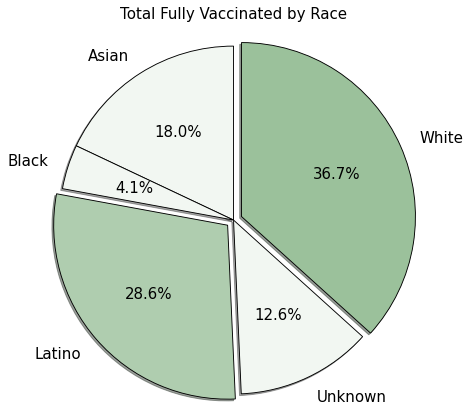

<IPython.core.display.Javascript object>

In [4]:
vacc_visual = vacc_race.groupby("race_ethnicity").sum()
labels = vacc_visual["fully_vaccinated"].index.str.capitalize()
explode = [0, 0, 0.09, 0, 0.1]
colors = ["#f2f7f2", "#f2f7f2", "#afcdaf", "#f2f7f2", "#9bc19b"]
plt.pie(
    vacc_visual["fully_vaccinated"],
    labels=labels,
    explode=explode,
    startangle=90,
    radius=2,
    labeldistance=1.12,
    autopct="%1.1f%%",
    colors=colors,
    shadow=True,
    textprops={"fontsize": 15},
    wedgeprops={"edgecolor": "k", "linewidth": 0.9, "antialiased": True,},
)
plt.title("Total Fully Vaccinated by Race", y=1.4, fontsize=15)
plt.show()

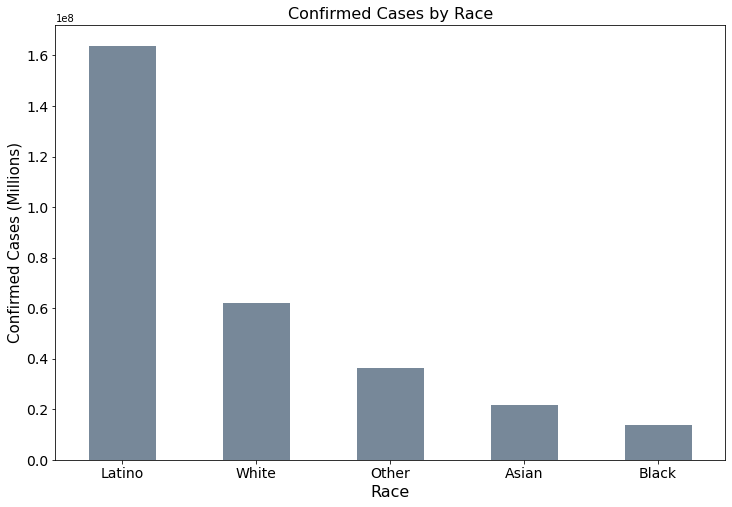

<IPython.core.display.Javascript object>

In [5]:
deaths_by_race = deaths_by_race.groupby("race").sum()
deaths_by_race = deaths_by_race.sort_values(
    by=["confirmed_cases_total"], ascending=False
)
deaths_by_race["confirmed_cases_total"].plot(
    kind="bar", figsize=(12, 8), fontsize=14, color="#778899",
)
plt.title(
    "Confirmed Cases by Race", fontdict={"fontsize": 16}, y=1,
)
plt.xlabel("Race", fontdict={"fontsize": 16})
plt.ylabel("Confirmed Cases (Millions)", fontdict={"fontsize": 15})
plt.xticks(rotation=0)
plt.show()

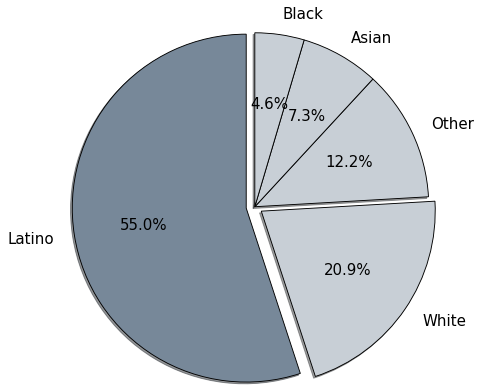

Text(0.5, 1.4, 'Confirmed Cases by Race')

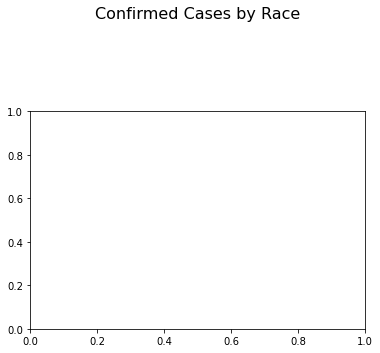

<IPython.core.display.Javascript object>

In [6]:
explode = [0.1, 0.09, 0, 0, 0]
labels2 = deaths_by_race.index.str.capitalize()
colors = ["#778899", "#c8cfd6", "#c8cfd6", "#c8cfd6", "#c8cfd6"]
plt.pie(
    deaths_by_race["confirmed_cases_total"],
    labels=labels2,
    explode=explode,
    startangle=90,
    radius=2,
    labeldistance=1.12,
    autopct="%1.1f%%",
    colors=colors,
    shadow=True,
    textprops={"fontsize": 15},
    wedgeprops={"edgecolor": "k", "linewidth": 0.9, "antialiased": True,},
)
plt.show()
plt.title("Confirmed Cases by Race", y=1.4, fontsize=16)


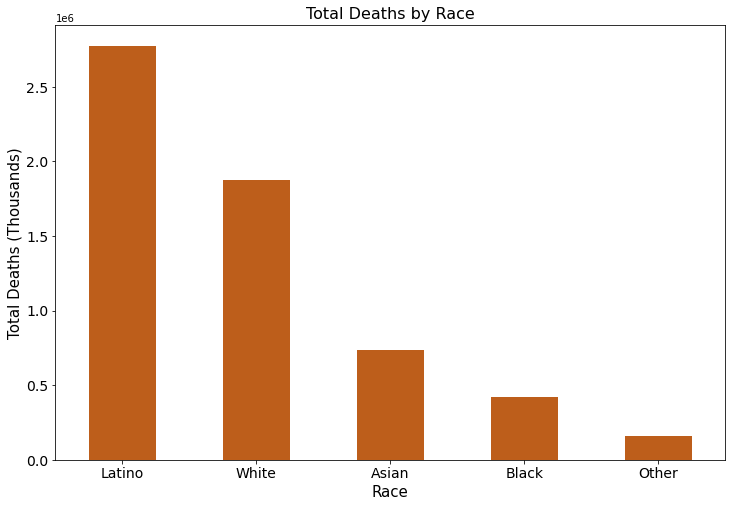

<IPython.core.display.Javascript object>

In [7]:
deaths_by_race = deaths_by_race.sort_values(by=["deaths_total"], ascending=False)
deaths_by_race["deaths_total"].plot(
    kind="bar", figsize=(12, 8), fontsize=14, color="#bd5e1b",
)
plt.title(
    "Total Deaths by Race", fontdict={"fontsize": 16}, y=1,
)
plt.xlabel("Race", fontdict={"fontsize": 15})
plt.ylabel("Total Deaths (Thousands)", fontdict={"fontsize": 15})
plt.xticks(rotation=0)
plt.show()

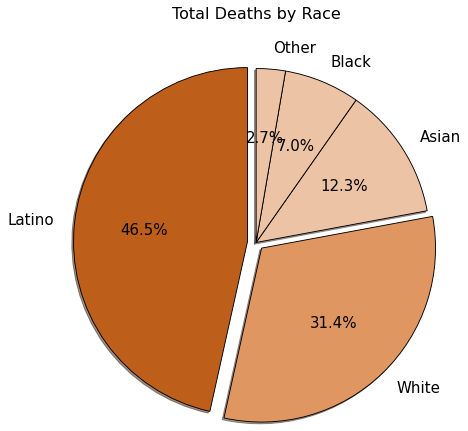

<IPython.core.display.Javascript object>

In [13]:
colors = ["#bd5e1b", "#df9661", "#edc3a5", "#edc3a5", "#edc3a5"]
labels3 = deaths_by_race.index.str.capitalize()
plt.pie(
    deaths_by_race["deaths_total"],
    labels=labels3,
    explode=explode,
    startangle=90,
    radius=2,
    labeldistance=1.12,
    autopct="%1.1f%%",
    colors=colors,
    shadow=True,
    textprops={"fontsize": 15},
    wedgeprops={"edgecolor": "k", "linewidth": 0.9, "antialiased": True,},
)
plt.title("Total Deaths by Race", y=1.5, fontsize=16)
plt.show()

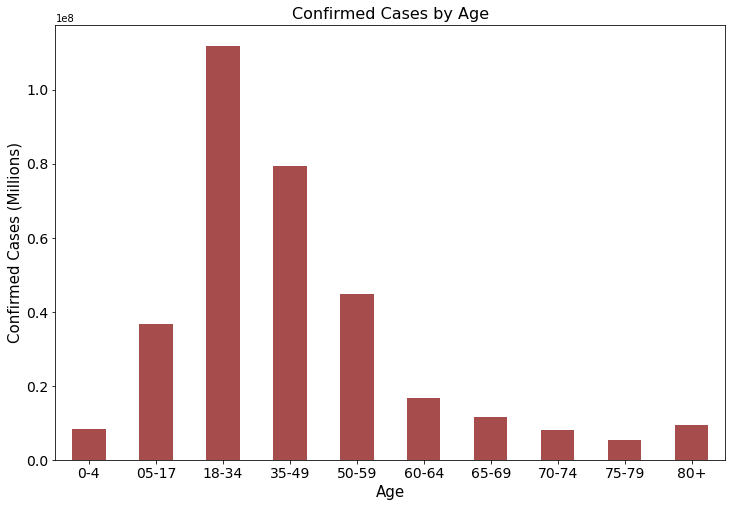

<IPython.core.display.Javascript object>

In [9]:
deaths_by_age1 = deaths_by_age.groupby("age").sum()
deaths_by_age1["confirmed_cases_total"].plot(
    kind="bar", figsize=(12, 8), fontsize=14, color="#a64c4c",
)
plt.title(
    "Confirmed Cases by Age", fontdict={"fontsize": 16}, y=1,
)
plt.xlabel("Age", fontdict={"fontsize": 15})
plt.ylabel("Confirmed Cases (Millions)", fontdict={"fontsize": 15})
plt.xticks(rotation=0)
plt.show()


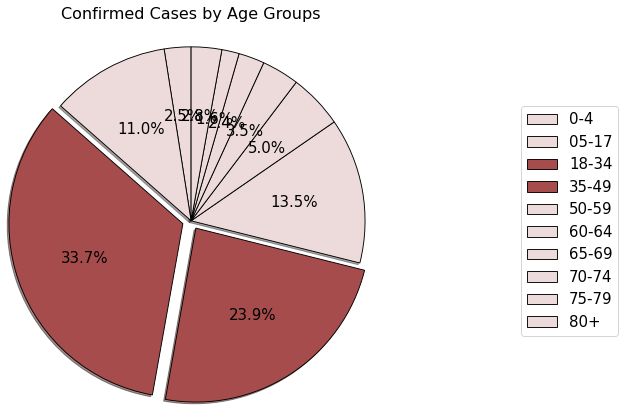

<IPython.core.display.Javascript object>

In [10]:
# race["confirmed_cases_total"].plot(kind="pie", autopct="%1.1f%%")


explode3 = [0, 0, 0.1, 0.1, 0, 0, 0, 0, 0, 0]
labels3 = deaths_by_age1.index.str.capitalize()
colors = [
    "#eddbdb",
    "#eddbdb",
    "#a64c4c",
    "#a64c4c",
    "#eddbdb",
    "#eddbdb",
    "#eddbdb",
    "#eddbdb",
    "#eddbdb",
    "#eddbdb",
]
plt.pie(
    deaths_by_age1["confirmed_cases_total"],
    labels=None,
    explode=explode3,
    startangle=90,
    radius=2,
    labeldistance=1.2,
    autopct="%1.1f%%",
    colors=colors,
    shadow=True,
    textprops={"fontsize": 15},
    wedgeprops={"edgecolor": "k", "linewidth": 0.9, "antialiased": True,},
)
plt.legend(loc=5, bbox_to_anchor=(2.5, 0.5), fontsize=15, labels=labels3)
plt.title("Confirmed Cases by Age Groups", y=1.4, fontsize=16)

plt.show()

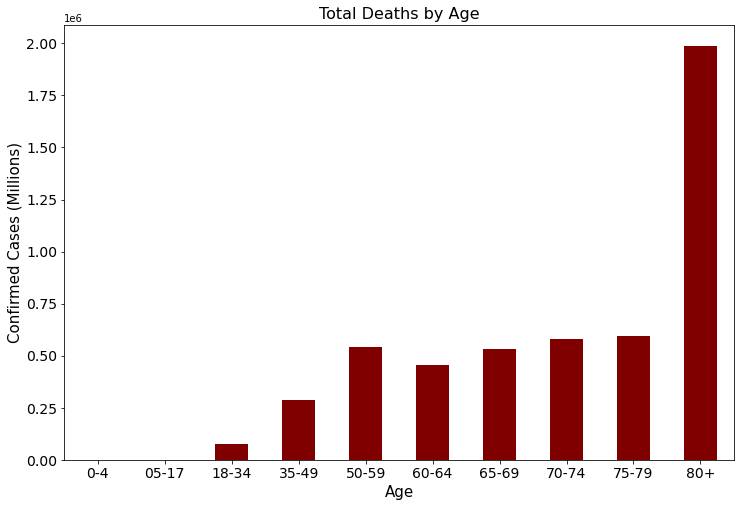

<IPython.core.display.Javascript object>

In [11]:
deaths_by_age1["deaths_total"].plot(
    kind="bar", figsize=(12, 8), fontsize=14, color="#800000",
)
plt.title(
    "Total Deaths by Age", fontdict={"fontsize": 16}, y=1,
)
plt.xlabel("Age", fontdict={"fontsize": 15})
plt.ylabel("Confirmed Cases (Millions)", fontdict={"fontsize": 15})
plt.xticks(rotation=0)
plt.show()

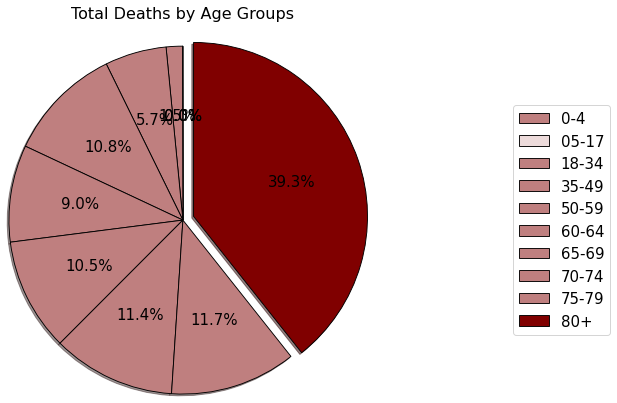

<IPython.core.display.Javascript object>

In [12]:
# deaths_by_age1["deaths_total"].plot(kind="pie")
explode2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.13]
labels3 = deaths_by_age1.index.str.capitalize()
colors = [
    "#bf7f7f",
    "#eddbdb",
    "#bf7f7f",
    "#bf7f7f",
    "#bf7f7f",
    "#bf7f7f",
    "#bf7f7f",
    "#bf7f7f",
    "#bf7f7f",
    "#800000",
]
plt.pie(
    deaths_by_age1["deaths_total"],
    labels=None,
    explode=explode2,
    startangle=90,
    radius=2,
    labeldistance=1.2,
    autopct="%1.1f%%",
    colors=colors,
    shadow=True,
    textprops={"fontsize": 15},
    wedgeprops={"edgecolor": "k", "linewidth": 0.9, "antialiased": True,},
)
plt.legend(loc=5, bbox_to_anchor=(2.5, 0.5), fontsize=15, labels=labels3)
plt.title("Total Deaths by Age Groups", y=1.4, fontsize=16)

plt.show()